## Changing Colorspaces

#### Goals
<p>• In this tutorial, you will learn how to convert images from one color-space to another, like BGR ↔ Gray, BGR
↔HSV etc.
<p>• In addition to that, we will create an application which extracts a colored object in a video
<p>• You will learn following functions : cv2.cvtColor(), cv2.inRange() etc.

<p>There are more than 150 color-space conversion methods available in OpenCV. But we will look into only two which
are most widely used ones, BGR↔Gray and BGR↔HSV.
<p>For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the
type of conversion.
<p>For BGR→Gray conversion we use the flags cv2.COLOR_BGR2GRAY. Similarly for BGR→HSV, we use the flag
cv2.COLOR_BGR2HSV. To get other flags, just run following commands in your Python terminal :

**Note:** For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use
different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

In [ ]:
import cv2

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print flags

## Object Tracking

<p>Now we know how to convert BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier
to represent a color than RGB color-space. In our application, we will try to extract a blue colored object. So here is
the method:
<p>• Take each frame of the video
<p>• Convert from BGR to HSV color-space
<p>• We threshold the HSV image for a range of blue color
<p>• Now extract the blue object alone, we can do whatever on that image we want.
<p>Below is the code which are commented in detail :

In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
if k == 27 & 0xFF== ord('q'):
    break
cv2.destroyAllWindows()

**Note:** This is the simplest method in object tracking. Once you learn functions of contours, you can do plenty of
things like find centroid of this object and use it to track the object, draw diagrams just by moving your hand in front
of camera and many other funny stuffs.

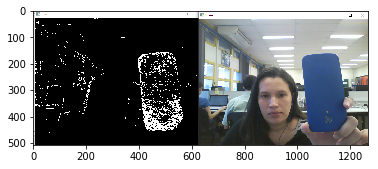

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load an color image in grayscale
img = cv2.imread('img/blue_object.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)

plt.show()

## How to find HSV values to track?

<p>This is a common question found in stackoverflow.com. It is very simple and you can use the same function,
cv2.cvtColor(). Instead of passing an image, you just pass the BGR values you want. For example, to find the

In [7]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print hsv_green

[[[ 60 255 255]]]


Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively. Apart from this
method, you can use any image editing tools like GIMP or any online converters to find these values, but don’t forget
to adjust the HSV ranges.